In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score,median_absolute_error

In [3]:
df = pd.read_csv("train.csv")
df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [5]:
df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [6]:
df['Podcast_Name'].unique()

array(['Mystery Matters', 'Joke Junction', 'Study Sessions',
       'Digital Digest', 'Mind & Body', 'Fitness First', 'Criminal Minds',
       'News Roundup', 'Daily Digest', 'Music Matters', 'Sports Central',
       'Melody Mix', 'Game Day', 'Gadget Geek', 'Global News',
       'Tech Talks', 'Sport Spot', 'Funny Folks', 'Sports Weekly',
       'Business Briefs', 'Tech Trends', 'Innovators', 'Health Hour',
       'Comedy Corner', 'Sound Waves', 'Brain Boost', "Athlete's Arena",
       'Wellness Wave', 'Style Guide', 'World Watch', 'Humor Hub',
       'Money Matters', 'Healthy Living', 'Home & Living',
       'Educational Nuggets', 'Market Masters', 'Learning Lab',
       'Lifestyle Lounge', 'Crime Chronicles', 'Detective Diaries',
       'Life Lessons', 'Current Affairs', 'Finance Focus', 'Laugh Line',
       'True Crime Stories', 'Business Insights', 'Fashion Forward',
       'Tune Time'], dtype=object)

# EDA

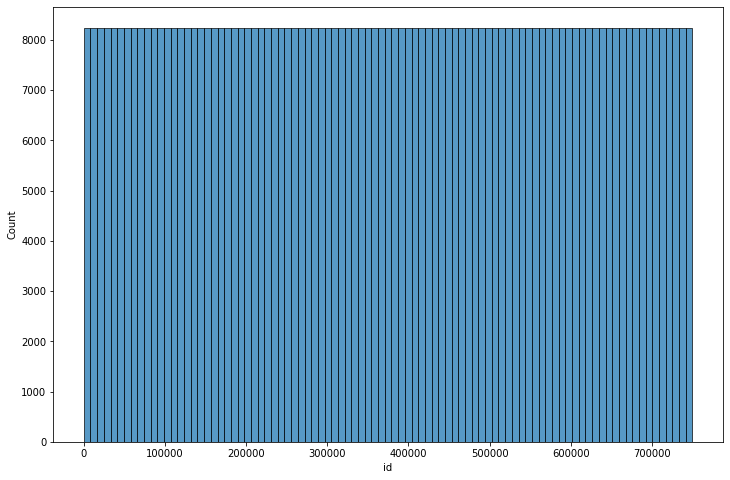

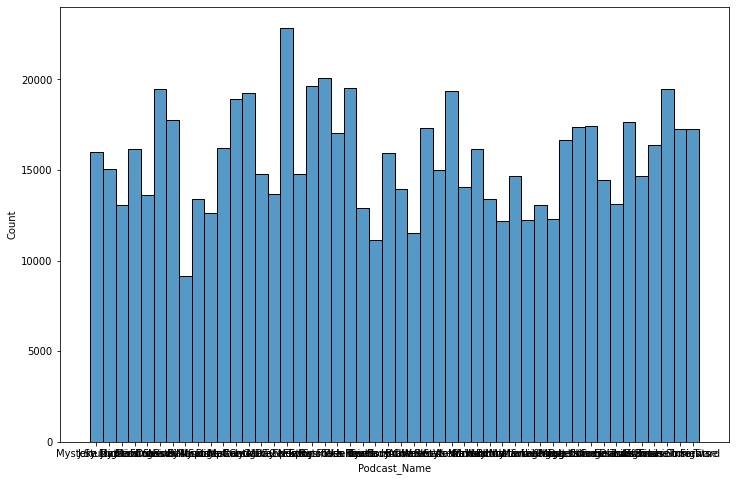

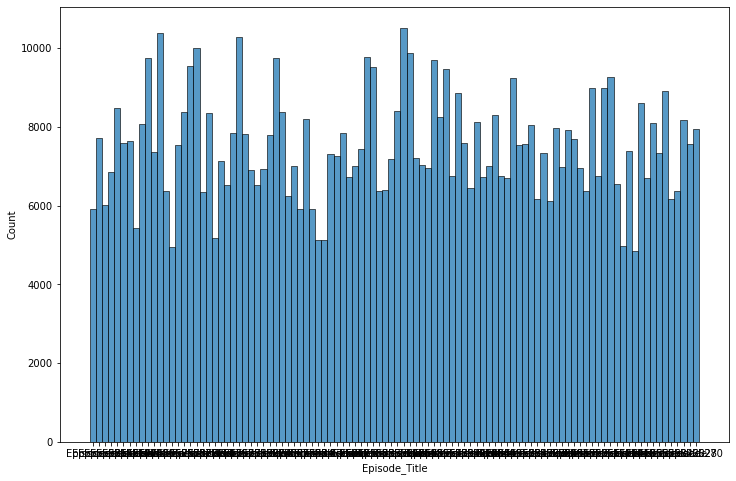

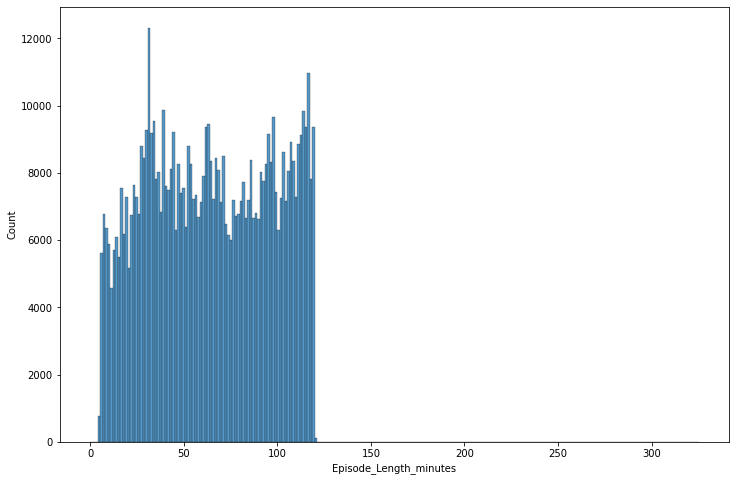

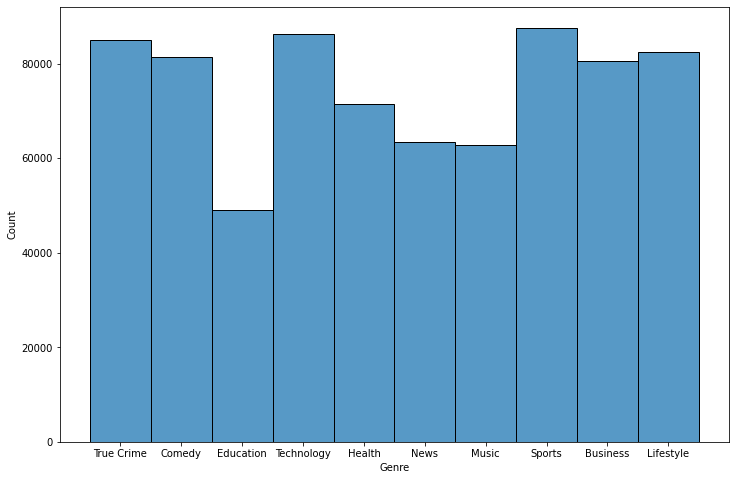

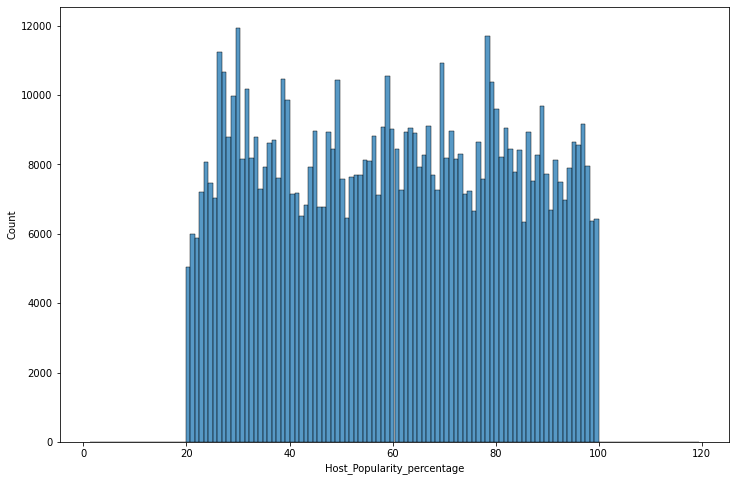

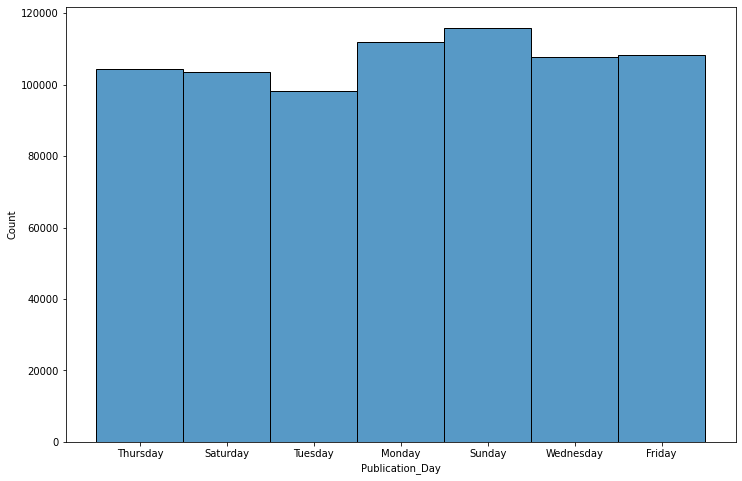

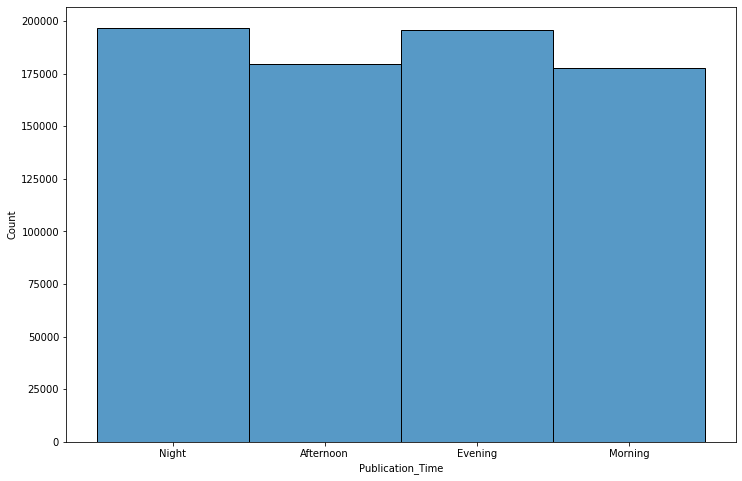

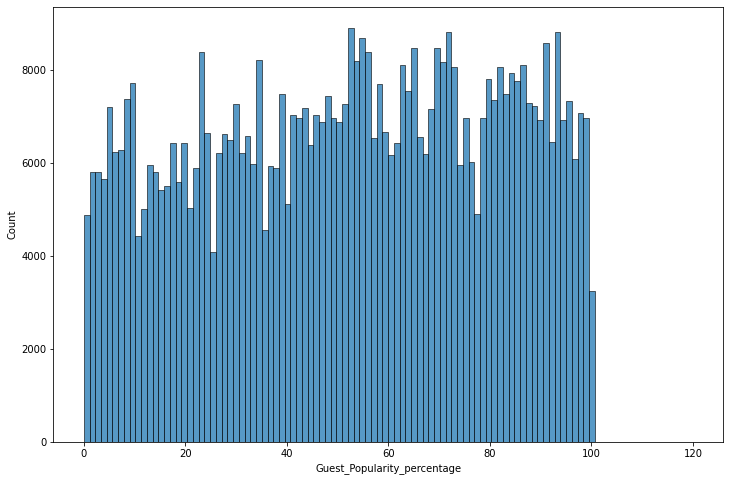

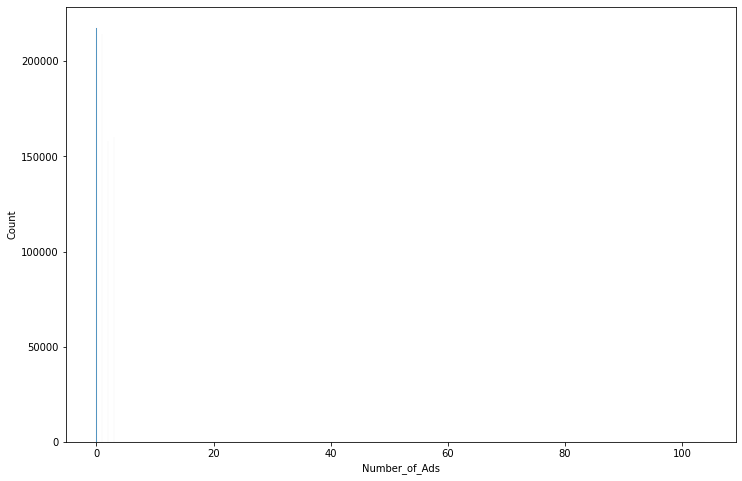

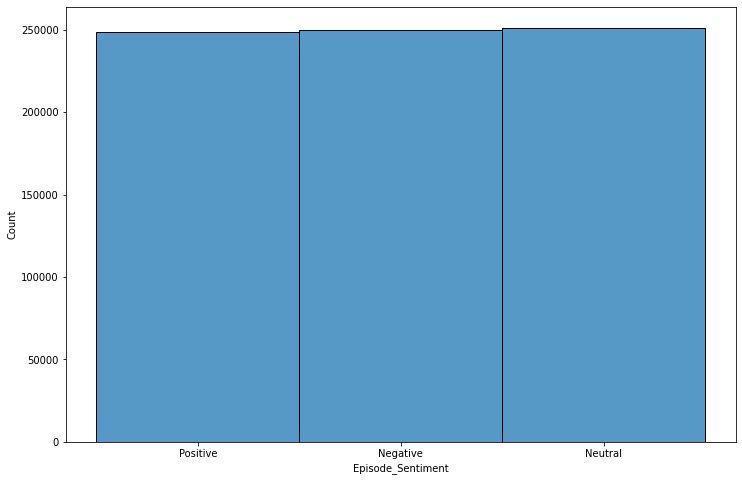

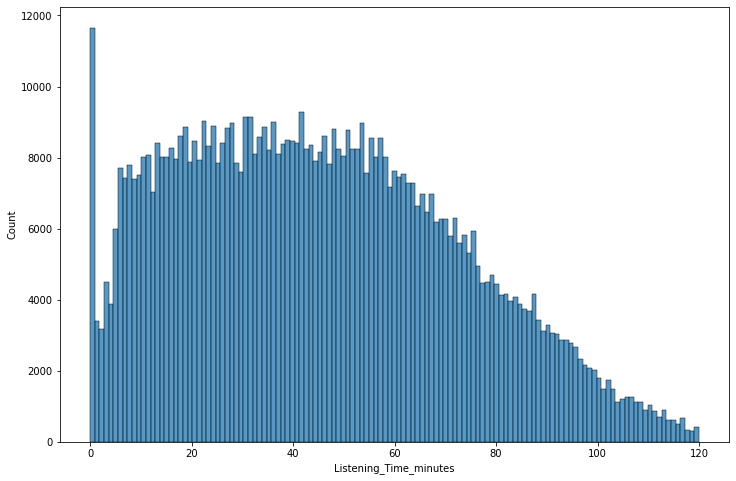

In [7]:
for i in df:
    plt.figure(figsize=(12,8))
    sns.histplot(df[i])
    plt.show()

In [8]:
#check null values

df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

# Preprocessing


In [9]:
#Fill null value 
df["Episode_Length_minutes"] = df.fillna(df["Episode_Length_minutes"].mean())
df["Guest_Popularity_percentage"] = df.fillna(df["Guest_Popularity_percentage"].mean())
df["Number_of_Ads"] = df.fillna(df["Number_of_Ads"].mean())

df.isnull().sum()


id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [10]:
# Encoding
df["Podcast_Name"] = LabelEncoder().fit_transform(df["Podcast_Name"])
df["Episode_Title"] = LabelEncoder().fit_transform(df["Episode_Title"])
df["Genre"] = LabelEncoder().fit_transform(df["Genre"])
df["Publication_Day"] = LabelEncoder().fit_transform(df["Publication_Day"])
df["Publication_Time"] = LabelEncoder().fit_transform(df['Publication_Time'])
df['Episode_Sentiment'] = LabelEncoder().fit_transform(df['Episode_Sentiment'])

df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  int32  
 2   Episode_Title                750000 non-null  int32  
 3   Episode_Length_minutes       750000 non-null  object 
 4   Genre                        750000 non-null  int32  
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  int32  
 7   Publication_Time             750000 non-null  int32  
 8   Guest_Popularity_percentage  750000 non-null  object 
 9   Number_of_Ads                750000 non-null  object 
 10  Episode_Sentiment            750000 non-null  int32  
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(2), int32(6), int64(1), object(3)
memory usage:

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,98,0,9,74.81,4,3,0,0,2,31.41998
1,1,24,19,1,1,66.95,2,0,1,1,0,88.01241
2,2,40,8,2,2,69.97,5,1,2,2,0,44.92531
3,3,10,40,3,8,57.22,1,2,3,3,2,46.27824
4,4,31,85,4,3,80.07,1,0,4,4,1,75.61031


In [11]:
#Normalization

df[["Host_Popularity_percentage"]]= MinMaxScaler().fit_transform(df[["Host_Popularity_percentage"]])
df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,34,98,0,9,0.622123,4,3,0,0,2,31.41998
1,1,24,19,1,1,0.555603,2,0,1,1,0,88.01241
2,2,40,8,2,2,0.581161,5,1,2,2,0,44.92531
3,3,10,40,3,8,0.473257,1,2,3,3,2,46.27824
4,4,31,85,4,3,0.666638,1,0,4,4,1,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,26,18,749995,2,0.575999,2,2,749995,749995,0,56.87058
749996,749996,2,14,749996,0,0.286984,2,3,749996,749996,1,45.46242
749997,749997,28,47,749997,4,0.654028,4,2,749997,749997,0,15.26000
749998,749998,41,42,749998,4,0.373138,4,2,749998,749998,0,100.72939


In [12]:
#Drop unnecessary column
df.drop('id',axis=1)

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,34,98,0,9,0.622123,4,3,0,0,2,31.41998
1,24,19,1,1,0.555603,2,0,1,1,0,88.01241
2,40,8,2,2,0.581161,5,1,2,2,0,44.92531
3,10,40,3,8,0.473257,1,2,3,3,2,46.27824
4,31,85,4,3,0.666638,1,0,4,4,1,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
749995,26,18,749995,2,0.575999,2,2,749995,749995,0,56.87058
749996,2,14,749996,0,0.286984,2,3,749996,749996,1,45.46242
749997,28,47,749997,4,0.654028,4,2,749997,749997,0,15.26000
749998,41,42,749998,4,0.373138,4,2,749998,749998,0,100.72939


In [13]:
#splitting

x = df.drop('Listening_Time_minutes',axis=1)
y = df['Listening_Time_minutes']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 2702303330)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

600000
600000
150000
150000


# Modeling

In [14]:
model = LinearRegression() 
model = model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(mae)
print(r2)


22.52245056289174
0.003937346247628981


# Kaggle Submission

In [ ]:
test = pd.read_csv("test.csv")

#Fill null value 
test["Episode_Length_minutes"] = test.fillna(test["Episode_Length_minutes"].mean())
test["Guest_Popularity_percentage"] = test.fillna(test["Guest_Popularity_percentage"].mean())
test["Number_of_Ads"] = test.fillna(test["Number_of_Ads"].mean())

# Encoding
test["Podcast_Name"] = LabelEncoder().fit_transform(test["Podcast_Name"])
test["Episode_Title"] = LabelEncoder().fit_transform(test["Episode_Title"])
test["Genre"] = LabelEncoder().fit_transform(test["Genre"])
test["Publication_Day"] = LabelEncoder().fit_transform(test["Publication_Day"])
test["Publication_Time"] = LabelEncoder().fit_transform(test['Publication_Time'])
test['Episode_Sentiment'] = LabelEncoder().fit_transform(test['Episode_Sentiment'])

#Normalization
test[["Host_Popularity_percentage"]]= MinMaxScaler().fit_transform(test[["Host_Popularity_percentage"]])

test_pred = model.predict(test)
test_pred['id'] = test['id']
#Drop unnecessary column
test.drop('id',axis=1)

test_pred = pd.DataFrame(test_pred,columns=['Listening_Time_minutes'])
test_pred.to_csv('submission.csv',index=False)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices